In [10]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
corr = data.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


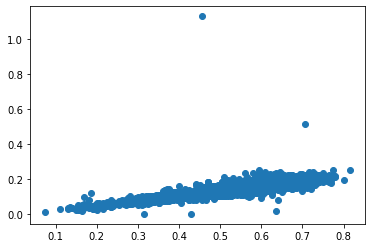

In [70]:
plt.scatter(data["Length"], data["Height"])

In [78]:
X = data["Length"]
Y = data["Height"] + 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [46]:
X_train.shape

(3132,)

In [79]:
class LinearLeastSquare:
    def __init__(self):
        pass
    
    # train
    def fit(self, X, Y):
        X = X.values.reshape(-1, 1)
        Y = Y.values.reshape(-1, 1)
        # w = شیب خط
        # w = (X.T X)^-1 * X.T Y
        self.w = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, x):
        height_pred = x * self.w
        return height_pred
    
    def evaluate(self, X, Y, loss="MAE"):
        X = X.values.reshape(-1, 1)
        Y = Y.values.reshape(-1, 1)
        
        Y_pred = []
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i])
            Y_pred.append(y_pred)
        
        Y_pred = np.array(Y_pred)
        Error = Y - Y_pred

        if loss == "MAE":
            return np.mean(np.abs(Error))
        elif loss == "MSE":
            return np.mean(Error ** 2)

In [80]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

In [45]:
lenght = 0.7
height = lls.predict(lenght)
print(height)

[[0.18736755]]


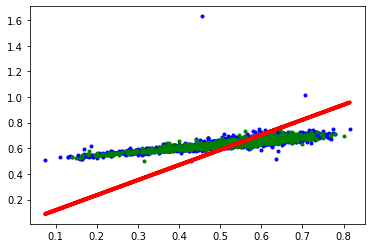

In [83]:
Y_pred = X_train * lls.w[0, 0]

plt.scatter(X_train, Y_train, c="b", marker=".")
plt.scatter(X_test, Y_test, c="g", marker=".")
plt.plot(X_train, Y_pred, c='r', lw=4)

In [76]:
lls.evaluate(X_test, Y_test, loss="MSE")

0.002528775724433053

In [77]:
lls.evaluate(X_test, Y_test, loss="MAE")

0.03931693998780262